In [257]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline


<h1 style="text-align:center">TESLA</h1>
<img src="tesla.jpg">

In [258]:
tesla_df = pd.read_csv('TESLA Search Trend vs Price.csv')


In [259]:
tesla_df.head()

,MONTH,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
0,2010-06-01,3,4.766
1,2010-07-01,3,3.988
2,2010-08-01,2,3.896
3,2010-09-01,2,4.082
4,2010-10-01,2,4.368


In [260]:
tesla_df.shape

(124, 3)

In [261]:
tesla_df.columns

Index(['MONTH', 'TSLA_WEB_SEARCH', 'TSLA_USD_CLOSE'], dtype='object')

In [262]:
tesla_df.isna().any()

MONTH              False
TSLA_WEB_SEARCH    False
TSLA_USD_CLOSE     False
dtype: bool

In [263]:
tesla_df.describe()

,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
count,124.000000,124.000000
mean,8.725806,50.962145
std,5.870332,65.908389
min,2.000000,3.896000
25%,3.750000,7.352500
50%,8.000000,44.653000
75%,12.000000,58.991999
max,31.000000,498.320007


In [264]:
type(tesla_df.MONTH[0])  #convert str to datetime 

str

In [265]:
tesla_df.MONTH = pd.to_datetime(tesla_df.MONTH)

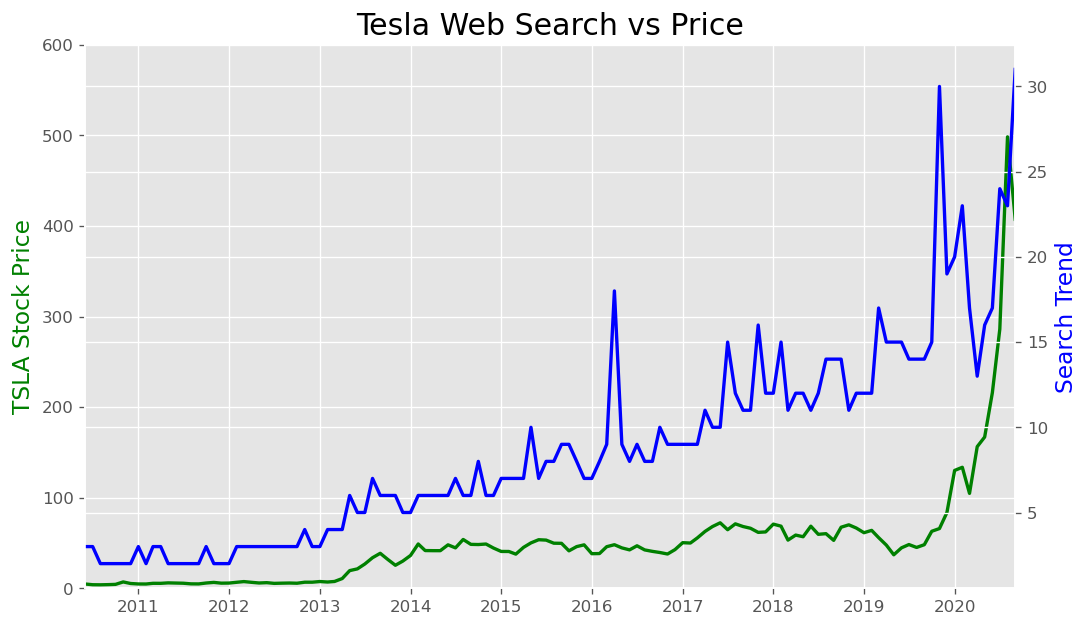

In [266]:
style.use('ggplot')
plt.figure(figsize=(10,6), dpi=120)

plt.title('Tesla Web Search vs Price', fontsize=18)
ax1 = plt.gca()
ax2 = ax1.twinx()

plt.xticks(fontsize=14, rotation=45)



# Set the minimum and maximum values on the axes
ax1.set_ylim([0, 600])
ax1.set_xlim([tesla_df.MONTH.min(), tesla_df.MONTH.max()])

ax1.set_ylabel('TSLA Stock Price',fontsize=14, color='g')
ax2.set_ylabel('Search Trend', fontsize=14, color='b')


ax1.plot(tesla_df['MONTH'], tesla_df['TSLA_USD_CLOSE'], 'g-', linewidth=2)
ax2.plot(tesla_df['MONTH'], tesla_df['TSLA_WEB_SEARCH'], 'b-', linewidth=2, markersize=3)


plt.show()

<h1 style="text-align:center; color:#2DB5BE">Unemployement</h1>
<img src="ue.jpg">

In [267]:
ue_df = pd.read_csv('UE Benefits Search vs UE Rate 2004-19.csv')
ue_df.head()

,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
0,2004-01,34,5.7
1,2004-02,33,5.6
2,2004-03,25,5.8
3,2004-04,29,5.6
4,2004-05,23,5.6


In [268]:
ue_df.MONTH[0]

'2004-01'

In [269]:
ue_df.shape

(181, 3)

In [270]:
ue_df.isna().any()

MONTH                     False
UE_BENEFITS_WEB_SEARCH    False
UNRATE                    False
dtype: bool

In [271]:
ue_df.MONTH = pd.to_datetime(ue_df.MONTH)

In [272]:
from matplotlib.dates import YearLocator, MonthLocator, DateFormatter
years = YearLocator()
months = MonthLocator()
years_fmt = DateFormatter('%Y')

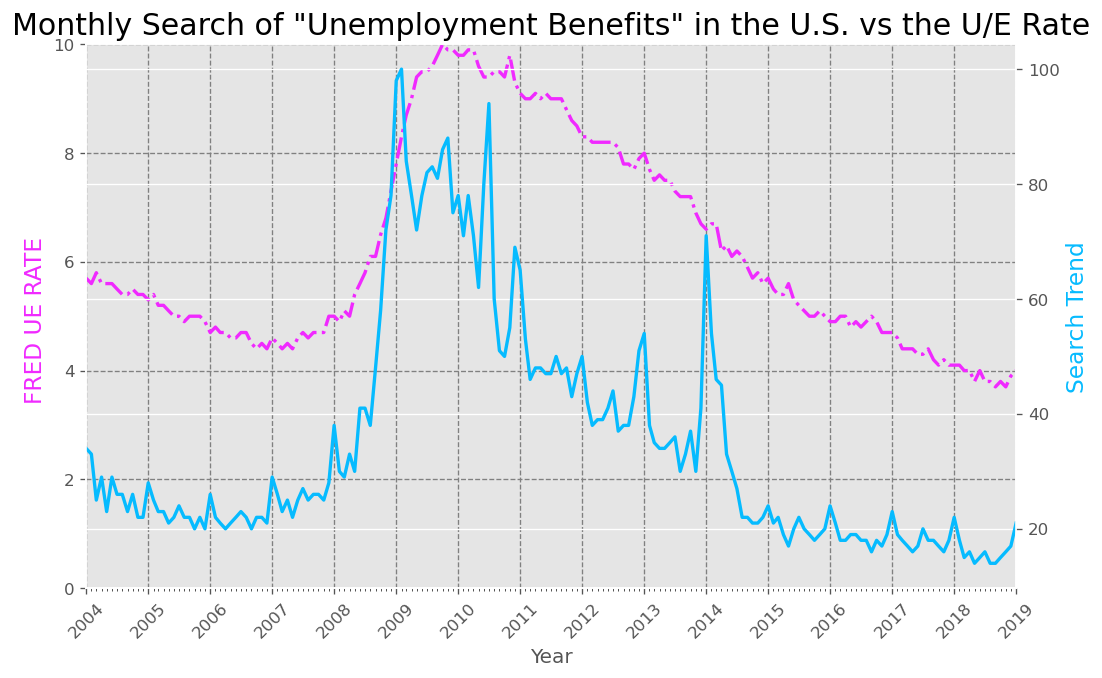

In [273]:
style.use('ggplot')
plt.figure(figsize=(10,6),dpi=120)

plt.xticks(rotation=45)
plt.title('Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate', fontsize=18)

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.grid(color='grey', linestyle='--')



# X eksenindeki yıllar arasındaki boşlukları ölçeklendirir.
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)


# Set the minimum and maximum values on the axes
ax1.set_ylim([0, 10])
ax1.set_xlim([ue_df.MONTH.min(), ue_df.MONTH.max()])

ax1.set_xlabel('Year')
ax1.set_ylabel('FRED UE RATE ', fontsize=14, color='#F029FF')
ax2.set_ylabel('Search Trend', fontsize=14, color='#06BBFF' )


ax1.plot(ue_df['MONTH'], ue_df.UNRATE, '#F029FF', linestyle='-.', linewidth=2)
ax2.plot(ue_df['MONTH'], ue_df.UE_BENEFITS_WEB_SEARCH, '#06BBFF', linestyle='-', linewidth=2)

plt.show()

In [274]:
## Calculate the 3-month or 6-month rolling average for the web searches. 
## Plot the 6-month rolling average search data against the actual unemployment. What do you see?

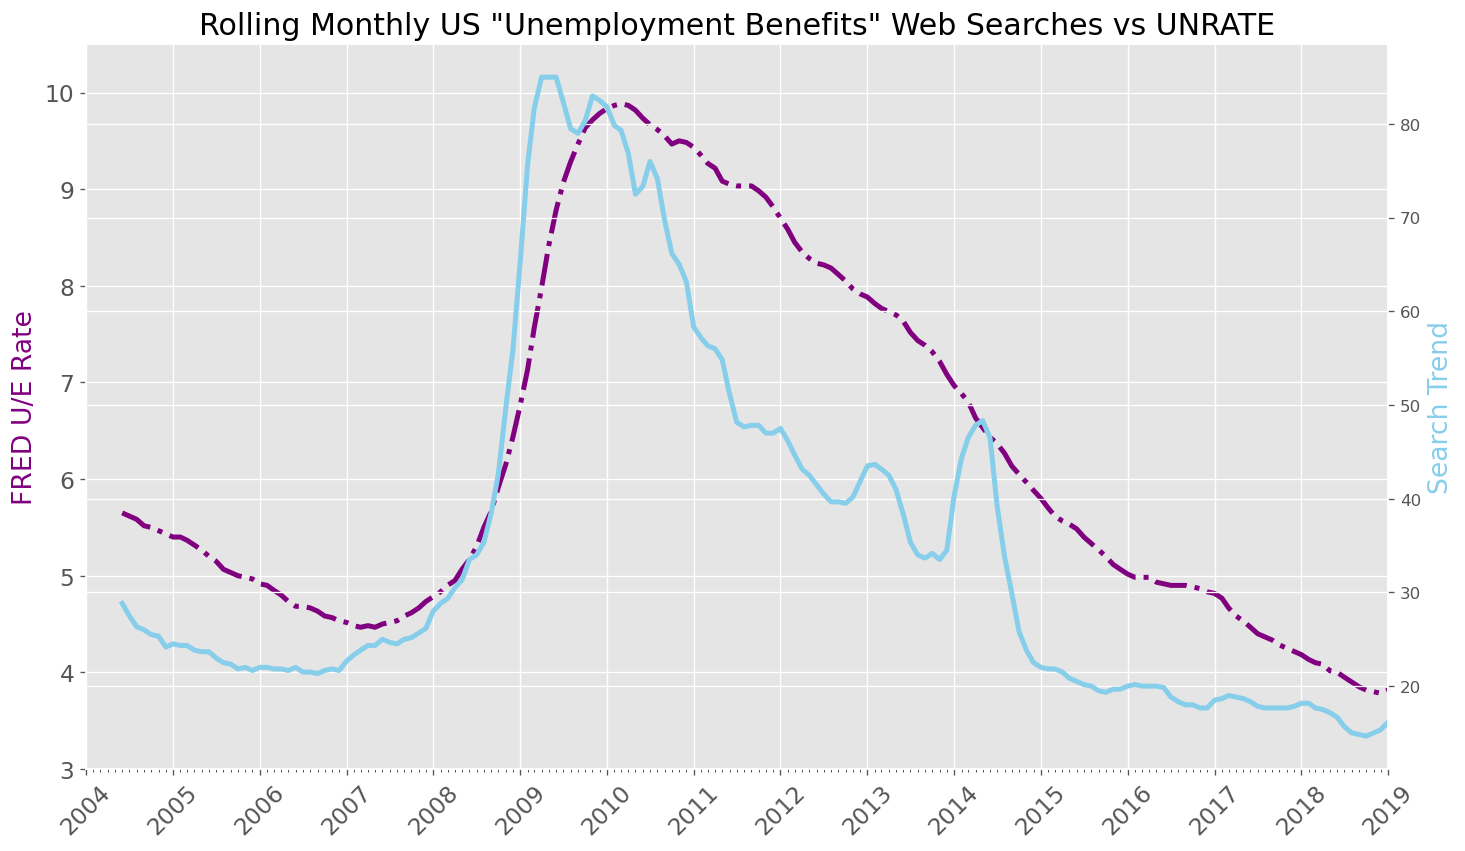

In [275]:
plt.figure(figsize=(14,8), dpi=120)
plt.title('Rolling Monthly US "Unemployment Benefits" Web Searches vs UNRATE', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=45)
 
ax1 = plt.gca()
ax2 = ax1.twinx()
 
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)
 
ax1.set_ylabel('FRED U/E Rate', color='purple', fontsize=16)
ax2.set_ylabel('Search Trend', color='skyblue', fontsize=16)
 
ax1.set_ylim(bottom=3, top=10.5)
ax1.set_xlim([ue_df.MONTH[0], ue_df.MONTH.max()])
 
# Calculate the rolling average over a 6 month window
roll_df = ue_df[['UE_BENEFITS_WEB_SEARCH', 'UNRATE']].rolling(window=6).mean()
 
ax1.plot(ue_df.MONTH, roll_df.UNRATE, 'purple', linewidth=3, linestyle='-.')
ax2.plot(ue_df.MONTH, roll_df.UE_BENEFITS_WEB_SEARCH, 'skyblue', linewidth=3)
 
plt.show()

In [276]:
ue20_df = pd.read_csv('UE Benefits Search vs UE Rate 2004-20.csv')

In [277]:
ue20_df.head()

,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
0,2004-01,9,5.7
1,2004-02,8,5.6
2,2004-03,7,5.8
3,2004-04,8,5.6
4,2004-05,6,5.6


In [278]:
## Read the data in the 'UE Benefits Search vs UE Rate 2004-20.csv' into a DataFrame. 
## Convert the MONTH column to Pandas Datetime objects and then plot the chart. What do you see?.

In [279]:
type(ue20_df.MONTH[0])

str

In [280]:
ue20_df.MONTH = pd.to_datetime(ue20_df.MONTH)

In [281]:
from matplotlib.dates import YearLocator, MonthLocator, DateFormatter
years = YearLocator()
months = MonthLocator()
years_fmt = DateFormatter('%Y')

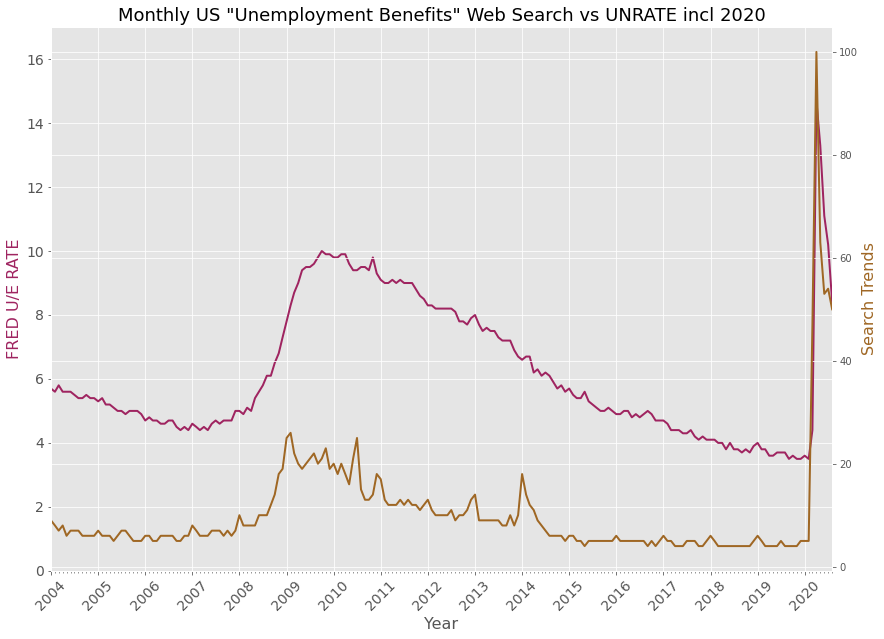

In [282]:
style.use('ggplot')
plt.figure(figsize=(14, 10))
plt.title('Monthly US "Unemployment Benefits" Web Search vs UNRATE incl 2020', fontsize=18)

plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=45)

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

ax1.set_xlabel('Year', fontsize=16)
ax1.set_ylabel('FRED U/E RATE', color='#9F2460', fontsize=16)
ax2.set_ylabel('Search Trends', color='#9F6724', fontsize=16)

 
ax1.set_ylim(bottom=0, top=17)
ax1.set_xlim([ue20_df.MONTH[0], ue20_df.MONTH.max()])

ax1.plot(ue20_df.MONTH, ue20_df.UNRATE, color='#9F2460', linestyle='-', linewidth=2)
ax2.plot(ue20_df.MONTH, ue20_df.UE_BENEFITS_WEB_SEARCH, color='#9F6724', linestyle='-', linewidth=2)

plt.show()

<h1 style="text-align:center; color:#0A559B">Bitcoin</h1>
<img src="bitcoin.jpg">

In [283]:
bitcoin_df = pd.read_csv('Bitcoin Search Trend.csv')
bitcoin_df.head()

,MONTH,BTC_NEWS_SEARCH
0,2014-09,5
1,2014-10,4
2,2014-11,4
3,2014-12,4
4,2015-01,5


In [284]:
bitcoin_df.shape

(73, 2)

In [285]:
bitcoin_df.isna().any()

MONTH              False
BTC_NEWS_SEARCH    False
dtype: bool

In [286]:
bitprice_df = pd.read_csv('Daily Bitcoin Price.csv')
bitprice_df.head()

,DATE,CLOSE,VOLUME
0,2014-09-17,457.334015,21056800.0
1,2014-09-18,424.440002,34483200.0
2,2014-09-19,394.795990,37919700.0
3,2014-09-20,408.903992,36863600.0
4,2014-09-21,398.821014,26580100.0


In [287]:
bitprice_df.shape

(2204, 3)

In [288]:
## Find missing value and data cleaning 

In [289]:
bitprice_df.isna().sum()

DATE      0
CLOSE     1
VOLUME    1
dtype: int64

In [290]:
bitprice_df.dropna(inplace=True) #optional Nan bulunan rowu bulmak için yapıldı. bitprice_df[bitprice_df.CLOSE.isna().values]

In [291]:
bitprice_df.isna().sum()

DATE      0
CLOSE     0
VOLUME    0
dtype: int64

In [292]:
## Convert any strings you find into Datetime objects. 

In [293]:
type(bitprice_df['DATE'].values[0])

str

In [294]:
bitprice_df.DATE = pd.to_datetime(bitprice_df['DATE'])

In [295]:
#we have to think about how to make our Bitcoin price and our Bitcoin search volume comparable. 
#Our Bitcoin price is daily data, but our Bitcoin Search Popularity is monthly data.
#To convert our daily data into monthly data, we're going to use the .resample() function. 

In [296]:
bitprice_monthly_df = bitprice_df.resample('M', on='DATE').last()
bitprice_monthly_df.shape

(73, 3)

In [297]:
bitprice_monthly_df.head()

,DATE,CLOSE,VOLUME
DATE,,,
2014-09-30,2014-09-30,386.944000,34707300.0
2014-10-31,2014-10-31,338.321014,12545400.0
2014-11-30,2014-11-30,378.046997,9194440.0
2014-12-31,2014-12-31,320.192993,13942900.0
2015-01-31,2015-01-31,217.464005,23348200.0


In [298]:
bitprice_monthly_df.mean()

C:\Users\Jossoft\AppData\Local\Temp\ipykernel_8580\840852336.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  bitprice_monthly_df.mean()


CLOSE     4.436989e+03
VOLUME    7.855852e+09
dtype: float64

In [299]:
from matplotlib.dates import YearLocator, MonthLocator, DateFormatter
years = YearLocator()
months = MonthLocator()
years_fmt = DateFormatter('%Y')

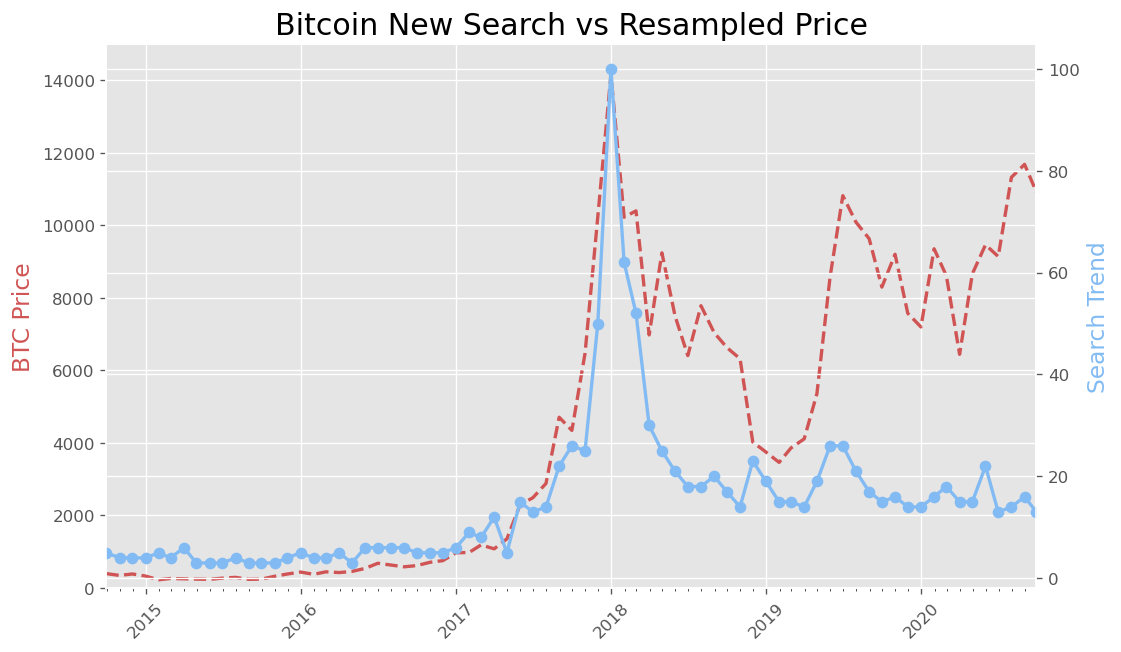

In [300]:
style.use('ggplot')
plt.figure(figsize=(10,6), dpi=120)
plt.xticks(rotation=45)
plt.title('Bitcoin New Search vs Resampled Price', fontsize=18)
ax1 = plt.gca()
ax2 = ax1.twinx()



# X eksenindeki yıllar arasındaki boşlukları ölçeklendirir.
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)

# Set the minimum and maximum values on the axes
ax1.set_ylim([0, 15000])
ax1.set_xlim([bitprice_monthly_df.DATE.min(), bitprice_monthly_df.DATE.max()])

ax1.set_ylabel('BTC Price', fontsize=14, color='#D05454')
ax2.set_ylabel('Search Trend', fontsize=14, color='#82BBF3' )


ax1.plot(bitprice_monthly_df['DATE'], bitprice_monthly_df.CLOSE, '#D05454', linestyle='dashed', linewidth=2)
ax2.plot(bitprice_monthly_df['DATE'], bitcoin_df.BTC_NEWS_SEARCH, '#82BBF3', linestyle='-', marker='o', linewidth=2)

plt.show()
